In [6]:
#Step 1:Load the training data in pandas, check for missing values and apply relevent diagnostics.
###########################################################################################
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc

test=pd.read_csv("C:/Users/Chris R/Desktop/Lantern/Machine Learning/titanic_test.csv")
train=pd.read_csv("C:/Users/Chris R/Desktop/Lantern/Machine Learning/titanic_train.csv")
gender=pd.read_csv("C:/Users/Chris R/Desktop/Lantern/Machine Learning/gender_submission.csv")

# train.info()
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
#Step 2: One hot encoding
################################################################
#Fill NAN Values & Use One-Hot Encoding
################################################################
def clean(train):
    train['Age']=train['Age'].fillna(train["Age"].median())
    train['Cabin']=train['Cabin'].fillna("0")
    train['Embarked']=train['Embarked'].fillna("S")
    train['Fare']=train['Fare'].fillna(train["Fare"].median())
    return train

train=clean(train)
test=clean(test)
###############################################################
sex_type = preprocessing.LabelEncoder()
sex_type.fit(train['Sex'])
train['male']=sex_type.transform(train['Sex'])
test['male']=sex_type.transform(test['Sex'])
###############################################################
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0


In [10]:
#Step 3: Baseline model
######################################################################
pred_indicators=['male','Pclass','Age','SibSp','Parch','Fare']
######################################################################
model= RandomForestClassifier(n_jobs=-1)

X,y = train[pred_indicators], train.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

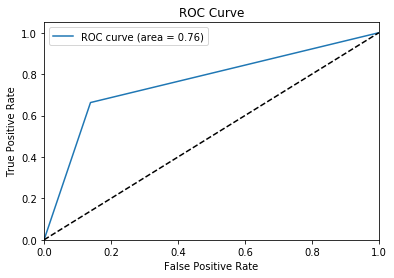

AUC: 0.76


In [11]:
model= RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
#####################################################################
fpr, tpr, t = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)
####################################################################
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper left")
plt.show();
####################################################################
print ('AUC: %0.2f' % roc_auc)
####################################################################
# modelCV=cross_validation.cross_val_score(model,X,y,cv=10)
# print(modelCV.mean())

[0.8830400485436893]
[0.8830400485436893, 0.938770479368932]
[0.8830400485436893, 0.938770479368932, 0.9638956310679612]
[0.8830400485436893, 0.938770479368932, 0.9638956310679612, 0.9736612560679612]
[0.8830400485436893, 0.938770479368932, 0.9638956310679612, 0.9736612560679612, 0.9717081310679612]
[0.8830400485436893, 0.938770479368932, 0.9638956310679612, 0.9736612560679612, 0.9717081310679612, 0.9763539138349515]
[0.8830400485436893, 0.938770479368932, 0.9638956310679612, 0.9736612560679612, 0.9717081310679612, 0.9763539138349515, 0.9763539138349515]
[0.8830400485436893, 0.938770479368932, 0.9638956310679612, 0.9736612560679612, 0.9717081310679612, 0.9763539138349515, 0.9763539138349515, 0.9770934466019418]
[0.8830400485436893, 0.938770479368932, 0.9638956310679612, 0.9736612560679612, 0.9717081310679612, 0.9763539138349515, 0.9763539138349515, 0.9770934466019418, 0.9763539138349515]
[0.8830400485436893, 0.938770479368932, 0.9638956310679612, 0.9736612560679612, 0.9717081310679612,

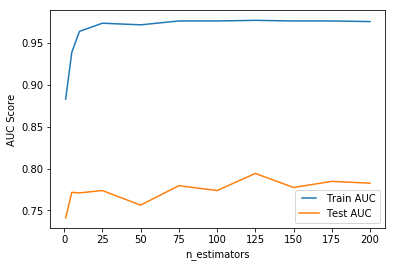

In [12]:
#Step 4: Number of Estimators
#########################################################################
n_estimators=[1,5,10,25,50,75,100,125,150,175,200]
results=[]
results1=[]
#########################################################################
for n in n_estimators:
    model= RandomForestClassifier(n_estimators=n, n_jobs=-1)
    model.fit(X_train, y_train)
    n_pred=model.predict(X_train)

    #####################################################################
    fpr, tpr, t = roc_curve(y_train, n_pred)
    roc_auc = auc(fpr, tpr)
    results.append(roc_auc)
    print(results)
#########################################################################    
    y_pred=model.predict(X_test)
#########################################################################
    fpr, tpr, t = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    results1.append(roc_auc)
#########################################################################
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, results,label="Train AUC" )
line2, = plt.plot(n_estimators, results1, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show();

[0.724780036407767]
[0.724780036407767, 0.8429156553398058]
[0.724780036407767, 0.8429156553398058, 0.9277912621359223]
[0.724780036407767, 0.8429156553398058, 0.9277912621359223, 0.9717081310679612]
[0.724780036407767, 0.8429156553398058, 0.9277912621359223, 0.9717081310679612, 0.9763539138349515]
[0.724780036407767, 0.8429156553398058, 0.9277912621359223, 0.9717081310679612, 0.9763539138349515, 0.9756143810679612]
[0.724780036407767, 0.8429156553398058, 0.9277912621359223, 0.9717081310679612, 0.9763539138349515, 0.9756143810679612, 0.9756143810679612]
[0.724780036407767, 0.8429156553398058, 0.9277912621359223, 0.9717081310679612, 0.9763539138349515, 0.9756143810679612, 0.9756143810679612, 0.9744007888349515]
[0.724780036407767, 0.8429156553398058, 0.9277912621359223, 0.9717081310679612, 0.9763539138349515, 0.9756143810679612, 0.9756143810679612, 0.9744007888349515, 0.9763539138349515]
[0.724780036407767, 0.8429156553398058, 0.9277912621359223, 0.9717081310679612, 0.9763539138349515, 

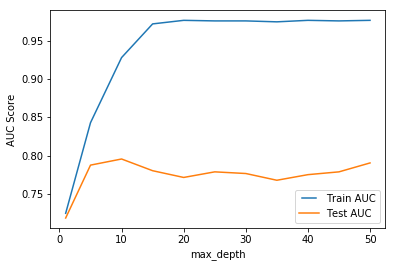

In [13]:
#Step 5: Tuning max_depth
###########################################################################
max_depth=[1,5,10,15,20,25,30,35,40,45,50]
results=[]
results1=[]
###########################################################################
for n in max_depth:
    model= RandomForestClassifier(n_estimators=100, max_depth=n, n_jobs=-1)
    model.fit(X_train, y_train)
    n_pred=model.predict(X_train)

    ######################################################################
    fpr, tpr, t = roc_curve(y_train, n_pred)
    roc_auc = auc(fpr, tpr)
    results.append(roc_auc)
    print(results)
##########################################################################   
    y_pred=model.predict(X_test)
##########################################################################
    fpr, tpr, t = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    results1.append(roc_auc)
##########################################################################
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, results,label="Train AUC" )
line2, = plt.plot(max_depth, results1, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("max_depth")
plt.show();

[0.8135239684466019]
[0.8135239684466019, 0.7787469660194175]
[0.8135239684466019, 0.7787469660194175, 0.7810224514563107]
[0.8135239684466019, 0.7787469660194175, 0.7810224514563107, 0.7471177184466019]
[0.8135239684466019, 0.7787469660194175, 0.7810224514563107, 0.7471177184466019, 0.7370866201456311]
[0.8135239684466019, 0.7787469660194175, 0.7810224514563107, 0.7471177184466019, 0.7370866201456311, 0.7399309769417476]
[0.8135239684466019, 0.7787469660194175, 0.7810224514563107, 0.7471177184466019, 0.7370866201456311, 0.7399309769417476, 0.5]
[0.8135239684466019, 0.7787469660194175, 0.7810224514563107, 0.7471177184466019, 0.7370866201456311, 0.7399309769417476, 0.5, 0.5]
[0.8135239684466019, 0.7787469660194175, 0.7810224514563107, 0.7471177184466019, 0.7370866201456311, 0.7399309769417476, 0.5, 0.5, 0.5]
[0.8135239684466019, 0.7787469660194175, 0.7810224514563107, 0.7471177184466019, 0.7370866201456311, 0.7399309769417476, 0.5, 0.5, 0.5, 0.5]


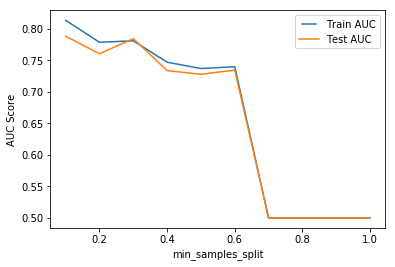

In [14]:
#STEP 6: min_samples _split
#########################################################################
min_samples_split=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
results=[]
results1=[]
#########################################################################
for n in min_samples_split:
    model= RandomForestClassifier(n_estimators=100, max_depth=30, 
                                  min_samples_split=n, n_jobs=-1)
    model.fit(X_train, y_train)
    n_pred=model.predict(X_train)

    #####################################################################
    fpr, tpr, t = roc_curve(y_train, n_pred)
    roc_auc = auc(fpr, tpr)
    results.append(roc_auc)
    print(results)
#########################################################################    
    y_pred=model.predict(X_test)
#########################################################################
    fpr, tpr, t = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    results1.append(roc_auc)
#########################################################################
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_split, results,label="Train AUC" )
line2, = plt.plot(min_samples_split, results1, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("min_samples_split")
plt.show();

[0.7552525788834952]
[0.7552525788834952, 0.7370297330097088]
[0.7552525788834952, 0.7370297330097088, 0.5]
[0.7552525788834952, 0.7370297330097088, 0.5, 0.5]
[0.7552525788834952, 0.7370297330097088, 0.5, 0.5, 0.5]


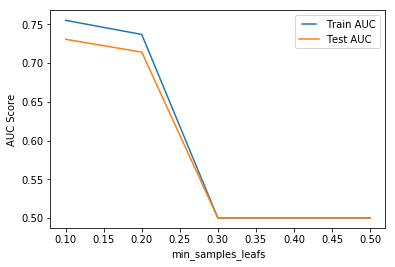

In [15]:
#STEP 7: min__samples _leaf
#########################################################################
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
results=[]
results1=[]
#########################################################################
for n in min_samples_leaf:
    model= RandomForestClassifier(n_estimators=100, max_depth=30, 
                                  min_samples_split=0.25, min_samples_leaf=n,
                                  n_jobs=-1)
    model.fit(X_train, y_train)
    n_pred=model.predict(X_train)

    #####################################################################
    fpr, tpr, t = roc_curve(y_train, n_pred)
    roc_auc = auc(fpr, tpr)
    results.append(roc_auc)
    print(results)
#########################################################################    
    y_pred=model.predict(X_test)
#########################################################################
    fpr, tpr, t = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    results1.append(roc_auc)
#########################################################################
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, results,label="Train AUC" )
line2, = plt.plot(min_samples_leaf, results1, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("min_samples_leafs")
plt.show();

[0.5]
[0.5, 0.5]
[0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.6722352851941747]
[0.5, 0.5, 0.5, 0.6722352851941747, 0.6722352851941747]
[0.5, 0.5, 0.5, 0.6722352851941747, 0.6722352851941747, 0.6722352851941747]


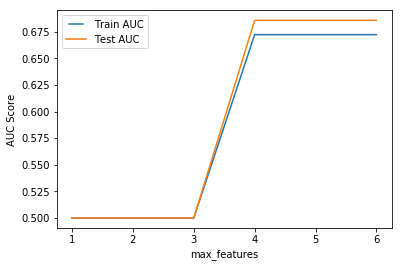

In [26]:
#STEP 8: max_features
#########################################################################

n_features=[1,2,3,4,5,6]

max_features = (list(1 * n_features))
results=[]
results1=[]
#########################################################################
for n in max_features:
    model= RandomForestClassifier(n_estimators=100, max_depth=30, 
                                  min_samples_split=0.25, min_samples_leaf=0.25,
                                  max_features=n, n_jobs=-1)
    model.fit(X_train, y_train)
    n_pred=model.predict(X_train)

    #####################################################################
    fpr, tpr, t = roc_curve(y_train, n_pred)
    roc_auc = auc(fpr, tpr)
    results.append(roc_auc)
    print(results)
#########################################################################    
    y_pred=model.predict(X_test)
#########################################################################
    fpr, tpr, t = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    results1.append(roc_auc)
#########################################################################
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, results,label="Train AUC" )
line2, = plt.plot(max_features, results1, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("max_features")
plt.show();

In [24]:
# Change PClass/Embarked categorical variables into dummy variables
# Pclass_dum_train= pd.get_dummies(train["Pclass"], prefix='Pclass', drop_first=True)
# Pclass_dum_test= pd.get_dummies(test["Pclass"], prefix='Pclass', drop_first=True)

# Embarked_dum_train= pd.get_dummies(train["Embarked"], prefix='Embarked', drop_first=True)
# Embarked_dum_test= pd.get_dummies(test["Embarked"], prefix='Embarked', drop_first=True)

#Add the Dummy Variables back to main dataset
# titanic_train= pd.concat([train, Pclass_dum_train, Embarked_dum_train], axis=1)
# titanic_test= pd.concat([test, Pclass_dum_test, Embarked_dum_test], axis=1)

# #Drop All Categorical Variables in new dataset
# X=titanic_train.drop(['Pclass', 'Cabin', 'Embarked', 'Name', 'Ticket', 'Sex'], axis=1, inplace=True)
# y=titanic_train.drop(['Survived'], axis=1, inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,None,None,None,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,None,1,0,PC 17599,None,None,None,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,None,None,None,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,None,1,0,113803,None,None,None,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,None,None,None,1,0,1
5,6,0,3,"Moran, Mr. James",male,None,0,0,330877,None,None,None,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,None,0,0,17463,None,None,None,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,None,3,1,349909,None,None,None,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,None,0,2,347742,None,None,None,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,None,1,0,237736,None,None,None,0,1,0
